In [167]:
%load_ext autoreload
%autoreload 2

import random
import xarray as xr
import zarr
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from functools import partial
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
ds = xr.open_zarr('data.zarr')
ds = ds.drop(['Lambert_Azimuthal_Grid', 'status_flag', 'ceda_sic_bin', 'era5_sic', 'era5_sic_bin', 'total_standard_error'])

In [169]:
ds

<xarray.Dataset>
Dimensions:      (time: 3502, y: 51, x: 63)
Coordinates:
    lat          (y, x) float32 dask.array<open_dataset-7f48a6a23349dc22f4ed3...
    lon          (y, x) float32 dask.array<open_dataset-7f48a6a23349dc22f4ed3...
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2012-01-01
  * x            (x) float64 -4.212e+03 -4.188e+03 ... -2.688e+03 -2.662e+03
  * y            (y) float64 312.5 287.5 262.5 237.5 ... -887.5 -912.5 -937.5
Data variables:
    ceda_sic     (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...
    sshf         (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...
    sst          (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...
    t2m          (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...
    u10          (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...
    v10          (time, y, x) float64 dask.array<open_dataset-7f48a6a23349dc2...

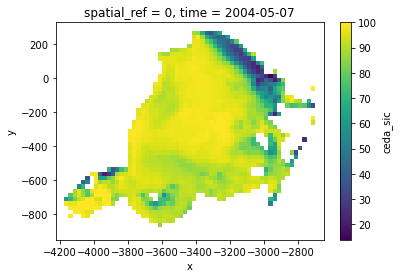

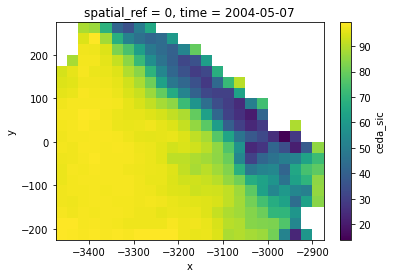

In [170]:
test_ds = ds['ceda_sic'].isel(time=706)
test_ds.plot()
plt.show()

test_win = test_ds.isel(x=slice(30, 54), y=slice(2, 22))
test_win.plot()
plt.show()

extent=59.0


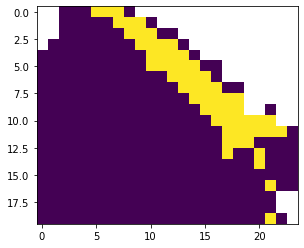

In [171]:
thresh = 50

test_win_arr = test_win.to_numpy()
arr = np.zeros_like(test_win_arr)

arr[test_win_arr < thresh] = 1
arr[np.isnan(test_win_arr)] = np.nan

plt.imshow(arr)

extent = np.nansum(arr)
print(f'{extent=}')

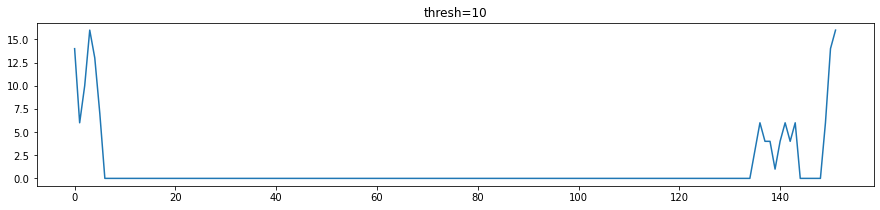

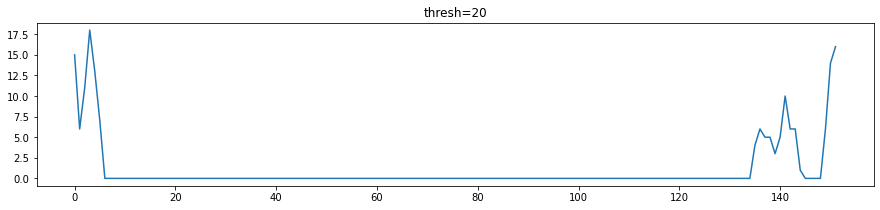

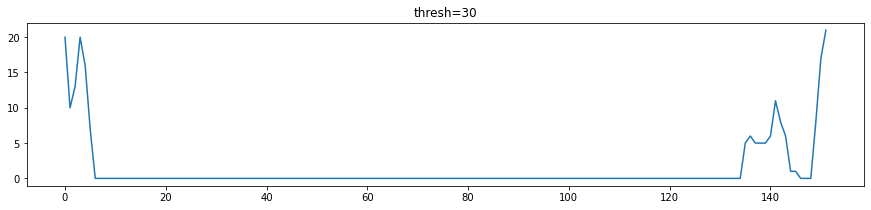

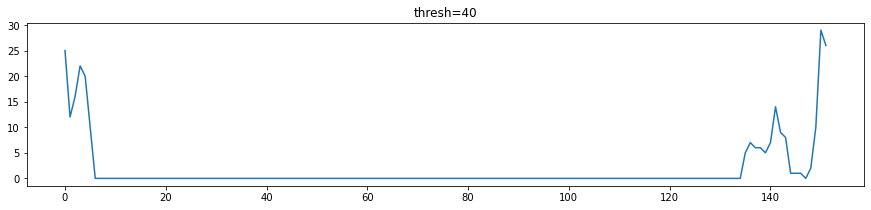

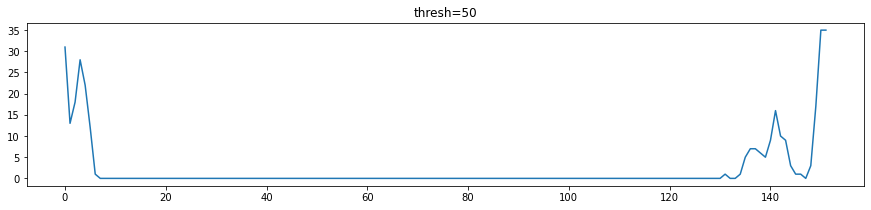

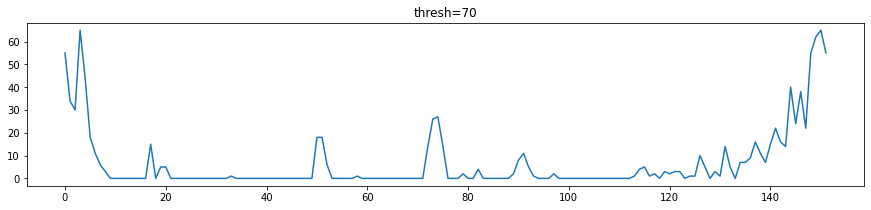

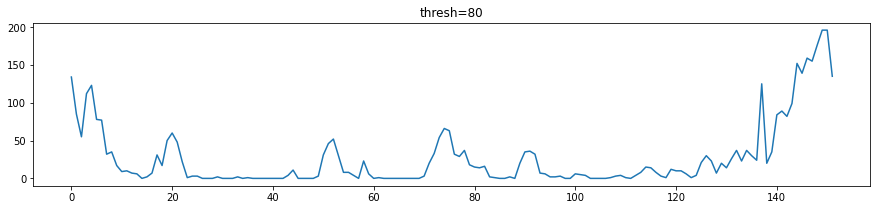

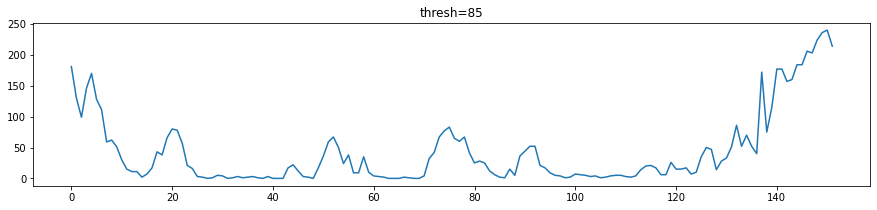

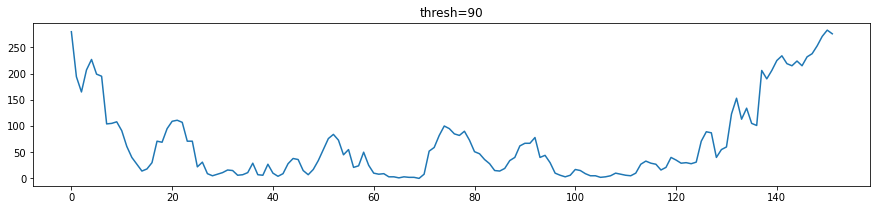

In [172]:
def apply_tresh(arr, thresh=50):
    arr_thresh = np.zeros_like(arr)
    arr_thresh[arr < thresh] = 1
    arr_thresh[np.isnan(arr)] = np.nan
    return arr_thresh

def get_extent(arr, thresh=50):
    arr_thresh = apply_tresh(arr, thresh)
    return np.nansum(arr_thresh)

ds_win = ds.isel(x=slice(30, 54), y=slice(2, 22))
ds_win = ds_win.sel(time=slice(datetime.datetime(2005, 12, 1), datetime.datetime(2006, 5, 1)))
ds_win_arr = ds_win.ceda_sic.to_numpy()

for thresh in [10, 20, 30, 40, 50, 70, 80, 85, 90]:
    extents = list(map(partial(get_extent, thresh=thresh), ds_win_arr))
    ds_win_arr_thresh = np.array(list(map(partial(apply_tresh, thresh=thresh), ds_win_arr)))
    plt.figure(figsize=(15, 3))
    plt.plot(extents)
    plt.title(f'{thresh=}')

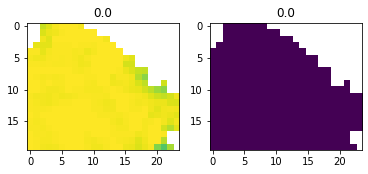

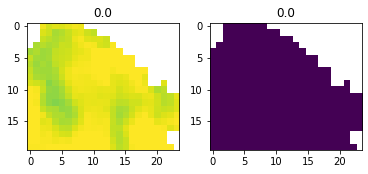

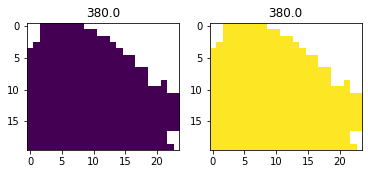

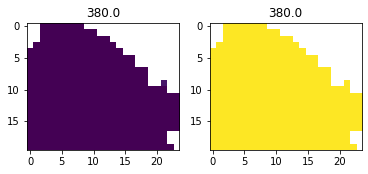

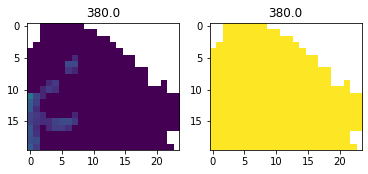

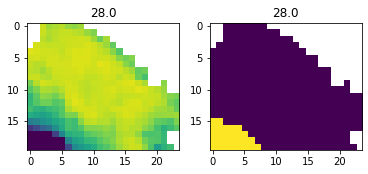

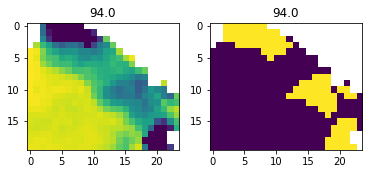

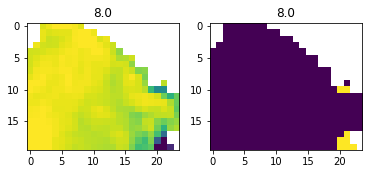

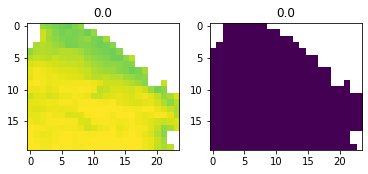

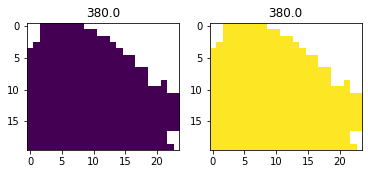

In [132]:
for i in range(10):
    i = random.choice(range(len(extents)))
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(ds_win_arr[i], vmin=0, vmax=100)
    axs[0].set_title(extents[i])
    
    axs[1].imshow(ds_win_arr_thresh[i], vmin=0, vmax=1)
    axs[1].set_title(extents[i])
    
    plt.show

In [173]:
ds_win = ds.isel(x=slice(30, 54), y=slice(2, 22))
ds_win_arr = ds_win.ceda_sic.to_numpy()
extents = list(map(partial(get_extent, thresh=85), ds_win_arr))

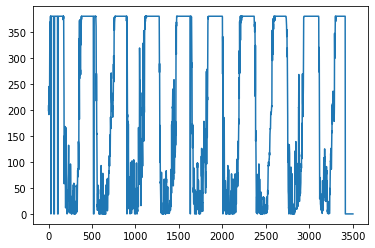

In [174]:
plt.plot(extents)

In [175]:
def fake_loss(y_true, y_pred):
    print(y_pred.shape)
    print(y_true.shape)
    return 0

# Construct the input layer with no definite frame size.
inp = layers.Masking()(layers.Input(shape=(None, *train_X.shape[2:])))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss=fake_loss, optimizer='adam')
model.summary()

NameError: name 'train_X' is not defined